In [4]:
import dlib
import cv2
import imutils
import numpy as np
from imutils import face_utils
import time

from matplotlib import pyplot as plt
from facemaskmaker import FaceMaskMaker
import jupiter_utils
import importlib

In [97]:
cnn_face_detector = dlib.cnn_face_detection_model_v1('../models/mmod_human_face_detector.dat')

In [98]:
def print_image(img, title = 'result'):
    plt.imshow(img)
    plt.title(title)
    plt.show()

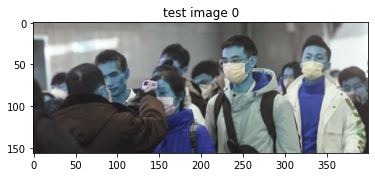

In [99]:
test_image0 = cv2.imread('../datasets/ds3_real_with_without_mask/images/maksssksksss1.png')

print_image(test_image0, 'test image 0')

Time execution: 0.3113539218902588
Faces: 4


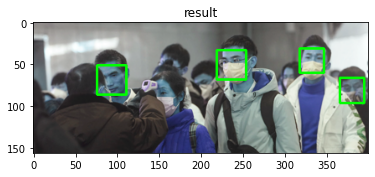

In [100]:
# CNN detect faces

t_start = time.time()

faces0 = cnn_face_detector(test_image0, 3)

t_end = time.time()
print(f'Time execution: {t_end-t_start}')
print(f'Faces: {len(faces0)}')

img_copy = test_image0.copy()
for face in faces0:
    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y

    cv2.rectangle(img_copy, (x,y), (x+w,y+h), (0,255,0), 2)

print_image(img_copy)

In [101]:
# OpenCv face detector

faceNet = cv2.dnn.readNet('../models/face_net/deploy.prototxt', '../models/face_net/res10_300x300_ssd_iter_140000.caffemodel')

In [102]:

image = test_image0.copy()
(h, w) = image.shape[:2]
# blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))
blob = cv2.dnn.blobFromImage(image)

faceNet.setInput(blob)

t_start = time.time()
detections = faceNet.forward()
t_end = time.time()
print(f'Time execution: {t_end-t_start}')

Time execution: 0.01700115203857422


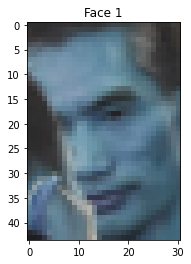

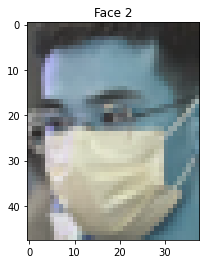

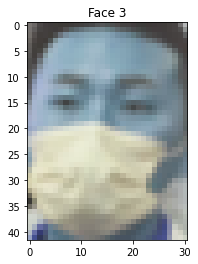

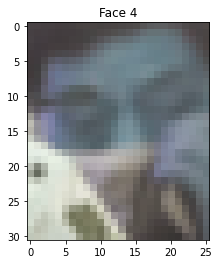

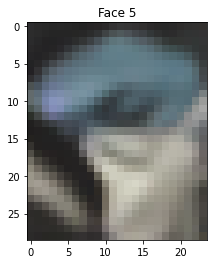

In [103]:
faces = []

for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence > 0.2:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        (startX, startY) = (max(0, startX), max(0, startY))
        (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

        face = image[startY:endY, startX:endX]
        faces.append(face)

for i in range(0, len(faces)):
    print_image(faces[i], f'Face {i+1}')

Execution Time (in seconds) :
HOG :  0.11


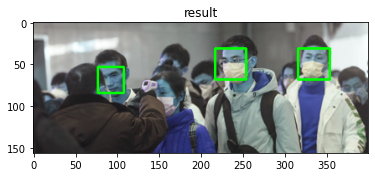

In [111]:
hor_detector = dlib.get_frontal_face_detector()
image = test_image0.copy()


start = time.time()

# apply face detection (hog)
faces_hog = hor_detector(image, 2)

end = time.time()
print("Execution Time (in seconds) :")
print("HOG : ", format(end - start, '.2f'))

# loop over detected faces
for face in faces_hog:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y

    # draw box over face
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

print_image(image)

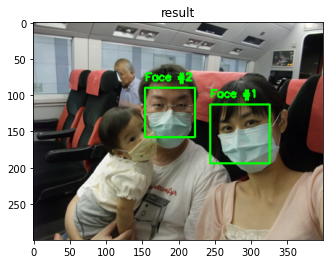

In [5]:
importlib.reload(jupiter_utils)
face_mask_maker = FaceMaskMaker({})
image = cv2.imread('../datasets/ds3_real_with_without_mask/images/maksssksksss7.png')
_, result_image =  face_mask_maker.get_face_rectangles_by_cnn_dlib(image, True)
jupiter_utils.print_image(result_image)

In [ ]:
image = cv2.imread('../datasets/ds3_real_with_without_mask/images/maksssksksss7.png')
